# Import, options

In [6]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [7]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [8]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [9]:
#data DEseq HEK293 
df_anno = pandas.read_csv(file_directory+'1) input/RNAseq/from_output/DEGs_HEK293_temp_annotated.csv',
                               sep = ',')
print(df_anno.shape)
df_anno.head()

(15323, 10)


,gene_id,gene_name,Gene type,Gene description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000000003,TSPAN6,protein_coding,tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858],1417.578539,0.236871,0.190655,1.242407,0.214086,0.729350
1,ENSG00000000419,DPM1,protein_coding,dolichyl-phosphate mannosyltransferase subunit...,4685.997108,0.422995,0.183466,2.305574,0.021134,0.357952
2,ENSG00000000457,SCYL3,protein_coding,SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...,135.788628,0.025567,0.324710,0.078738,0.937241,0.987078
3,ENSG00000000460,FIRRM,protein_coding,FIGNL1 interacting regulator of recombination ...,669.515399,-0.044322,0.230353,-0.192407,0.847423,0.966125
4,ENSG00000000971,CFH,protein_coding,complement factor H [Source:HGNC Symbol;Acc:HG...,78.489575,0.838610,0.413537,2.027894,0.042571,0.447272


## Plot visualization

### all

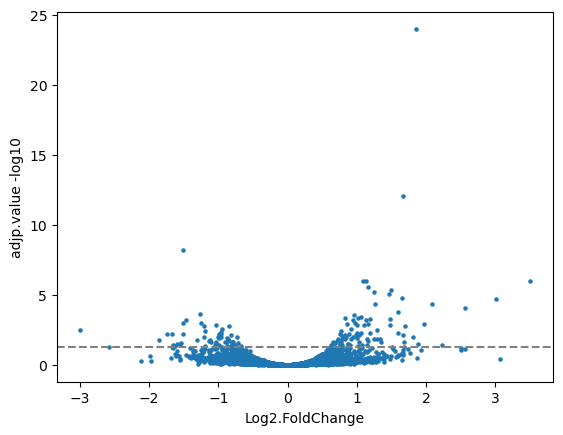

In [10]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df_anno['log2FoldChange'], y=df_anno['padj'].apply(lambda x:-numpy.log10(x)),s=5)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")

### Significant ones

In [12]:
# keep padj < 0.05
df_signif = df_anno[df_anno['padj'] < 0.05]
df_signif.shape

(143, 10)

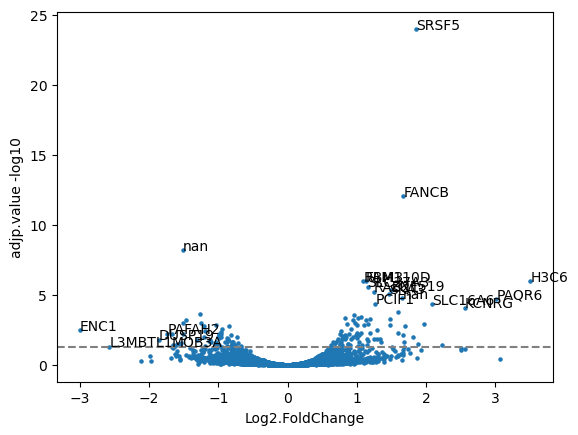

In [16]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
top_15 = df_signif.sort_values(by='padj', ascending=True).head(15)
topneg_5 = df_signif.sort_values(by='log2FoldChange', ascending=True).head(5)

plt.scatter(x=df_anno['log2FoldChange'], 
            y=df_anno['padj'].apply(lambda x:-numpy.log10(x)),s=5)

# Annotate points on the plot with Symbol names
for index, row in top_15.iterrows():
    plt.annotate(row['gene_name'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)
    
for index, row in topneg_5.iterrows():
    plt.annotate(row['gene_name'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")


title_file = 'volcano_HEK_deg'
# plt.savefig(file_directory+'3) output/RNAseq/'+title_file+'.svg')

In [15]:
df_anno.sort_values(by='padj', ascending=True)

,gene_id,gene_name,Gene type,Gene description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1989,ENSG00000100650,SRSF5,protein_coding,serine and arginine rich splicing factor 5 [So...,9552.911544,1.853514,0.166420,11.137596,8.231163e-29,1.016302e-24
11345,ENSG00000181544,FANCB,protein_coding,FA complementation group B [Source:HGNC Symbol...,1798.435913,1.669421,0.202066,8.261780,1.435157e-16,8.859944e-13
14956,ENSG00000276256,NaN,protein_coding,NaN,493.431221,-1.510055,0.213682,-7.066848,1.584928e-12,6.523034e-09
14916,ENSG00000274750,H3C6,protein_coding,H3 clustered histone 6 [Source:HGNC Symbol;Acc...,35.239178,3.508002,0.564554,6.213757,5.173237e-10,1.064566e-06
12578,ENSG00000197245,FAM110D,protein_coding,family with sequence similarity 110 member D [...,2186.406656,1.130433,0.181118,6.241401,4.336679e-10,1.064566e-06
...,...,...,...,...,...,...,...,...,...,...
15307,ENSG00000292327,PPP2R3B,protein_coding,protein phosphatase 2 regulatory subunit B''be...,16.428294,0.007681,0.635500,0.012087,9.903566e-01,NaN
15308,ENSG00000292332,IL3RA,protein_coding,interleukin 3 receptor subunit alpha [Source:H...,6.257552,-0.306968,1.317250,-0.233037,8.157328e-01,NaN
15309,ENSG00000292333,P2RY8,protein_coding,P2Y receptor family member 8 [Source:HGNC Symb...,16.794654,-0.410986,0.725378,-0.566582,5.709985e-01,NaN
15317,ENSG00000292357,CSF2RA,protein_coding,colony stimulating factor 2 receptor subunit a...,4.667981,-0.386116,1.417696,-0.272354,7.853496e-01,NaN
